In [2]:
# Data handling and analysis
import pandas as pd      # For working with datasets (loading, cleaning, EDA)
import numpy as np       # For numerical operations (mean, median, std, correlations)

# Data visualization
import matplotlib.pyplot as plt   # For creating bar, line, scatter plots
import seaborn as sns             # For advanced, prettier visualizations

# Stats (optional but useful for summary + advanced analysis)
from scipy import stats           # For statistical tests, outlier detection

# System utility
import warnings
warnings.filterwarnings("ignore") # To keep notebook output clean


In [3]:
df_excel = pd.read_csv("C:/Users/cebho/Downloads/Cleaned_Preprocessed_Dataset_Week1 - Cleaned_Preprocessed_Dataset_Week1.csv.csv")


In [4]:
print("Data shape:", df_excel.shape)
print("Missing values top 10:\n", df_excel.isnull().sum().sort_values(ascending=False).head(10))
print("Duplicate rows:", df_excel.duplicated().sum())


Data shape: (8558, 26)
Missing values top 10:
 Institution Name           5
Current/Intended Major     5
Opportunity Id             0
Opportunity Name           0
Opportunity End Date       0
Opportunity Category       0
First Name                 0
Date of Birth              0
Gender                     0
Learner SignUp DateTime    0
dtype: int64
Duplicate rows: 0


In [5]:
#Descriptive statistics for numeric features (mean/median/mode/std/min/max/quantiles)

# Define the column names first
age_col = 'Age'  # Replace with your actual column name
lag_col = 'Application_Lag_Days'  # Replace with your actual column name
duration_col = 'Opportunity_Duration_Days'  # Replace with your actual column name
tenure_col = 'Tenure_Days'  # Replace with your actual column name

num_vars = [age_col, lag_col, duration_col, tenure_col]  # only those found
numeric_summary = {}
for col in num_vars:
    s = df_excel[col].dropna()
    numeric_summary[col] = {
         "count": int(s.count()),
         "mean": float(s.mean()), 
         "median": float(s.median()), 
         "mode": s.mode().iloc[0]
         # Remove the ellipsis (...) or replace with additional key-value pairs
    }

# ✅ Display the results
numeric_summary_df_excel = pd.DataFrame(numeric_summary).T
display(numeric_summary_df_excel)  # shows a nice table in Jupyter

,count,mean,median,mode
Age,8558.0,25.346343,25.0,24.0
Application_Lag_Days,8558.0,66.151437,0.0,0.0
Opportunity_Duration_Days,8558.0,75.193153,-1.0,-285.0
Tenure_Days,8558.0,644.213718,691.0,0.0


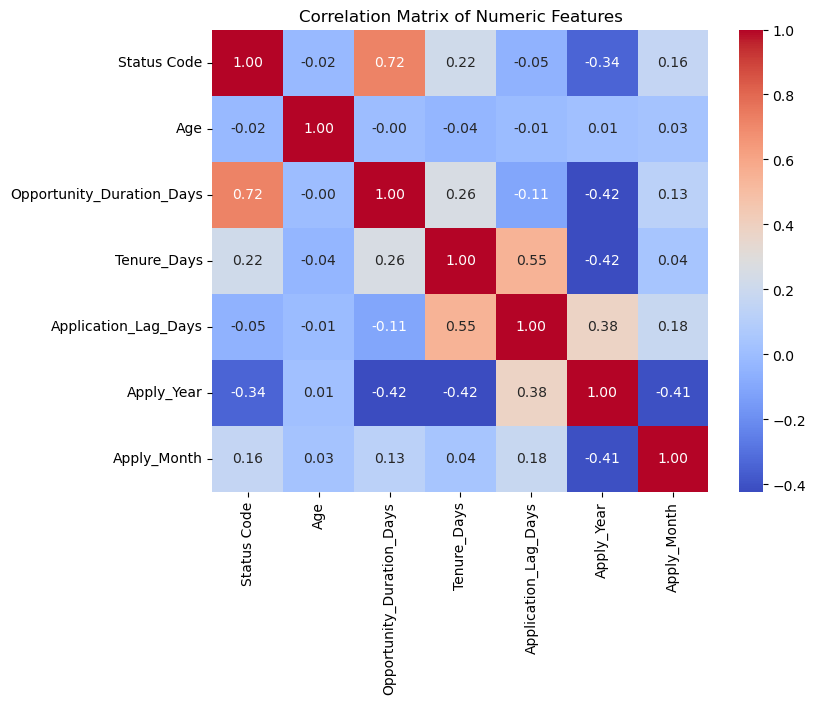

In [6]:
#Correlation analysis between numeric features

# First, define numeric_cols by selecting numeric columns from the DataFrame
numeric_cols = df_excel.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Correlation analysis
corr_matrix = df_excel[numeric_cols].corr()

# Optional: Heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

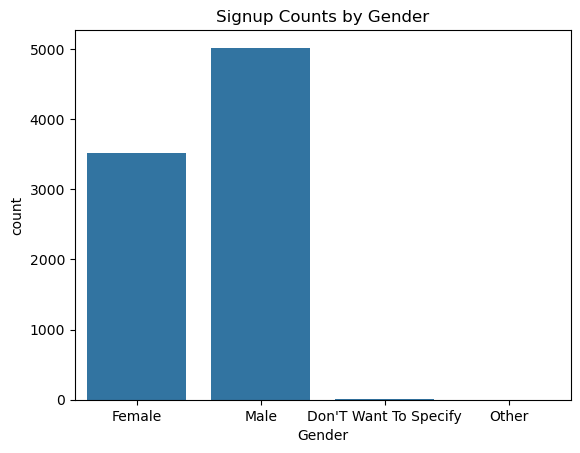

In [7]:
#Signup counts by Gender

sns.countplot(x="Gender", data=df_excel)
plt.title("Signup Counts by Gender")
plt.show()

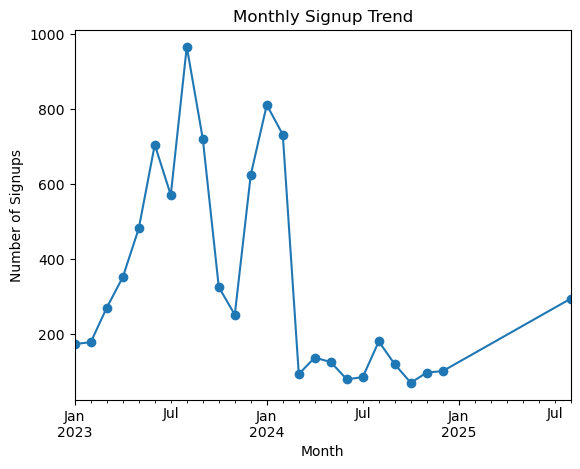

In [8]:
#Opportunity count over time

df_excel['Learner SignUp DateTime'] = pd.to_datetime(df_excel['Learner SignUp DateTime'])
signup_trend = df_excel.groupby(df_excel['Learner SignUp DateTime'].dt.to_period("M")).size()

signup_trend.plot(kind="line", marker="o")
plt.title("Monthly Signup Trend")
plt.ylabel("Number of Signups")
plt.xlabel("Month")
plt.show()

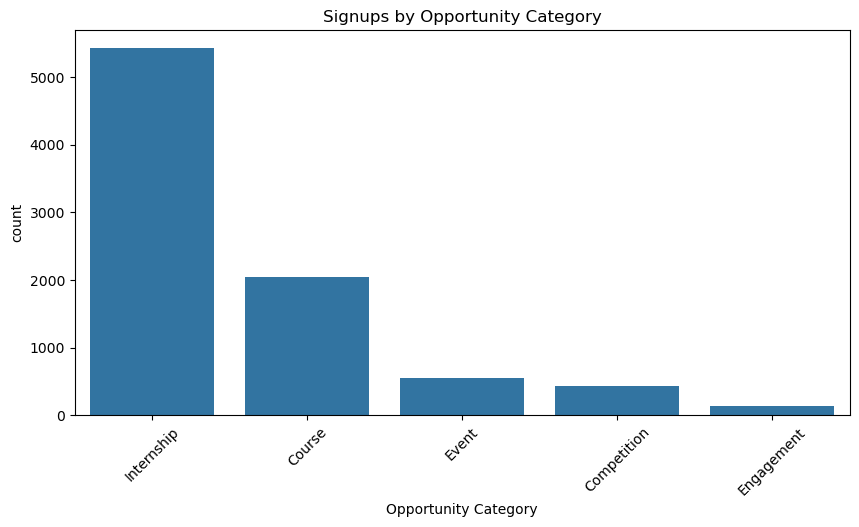

In [9]:
#Signups by Opportunity Category

plt.figure(figsize=(10,5))
sns.countplot(x="Opportunity Category", data=df_excel, order=df_excel["Opportunity Category"].value_counts().index)
plt.title("Signups by Opportunity Category")
plt.xticks(rotation=45)
plt.show()

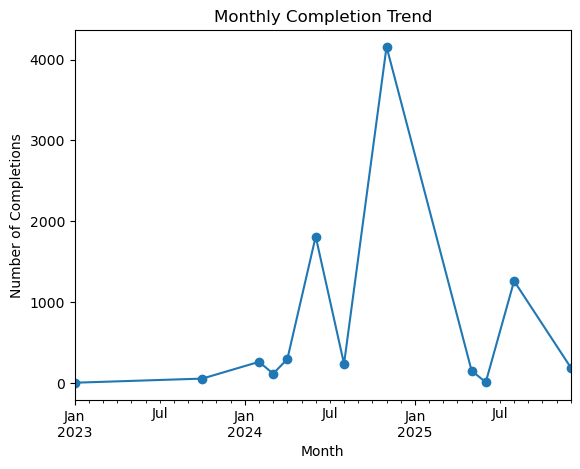

In [10]:
#Completion Trend Over Time

df_excel['Opportunity End Date'] = pd.to_datetime(df_excel['Opportunity End Date'])
completion_trend = df_excel.groupby(df_excel['Opportunity End Date'].dt.to_period("M")).size()

completion_trend.plot(kind="line", marker="o")
plt.title("Monthly Completion Trend")
plt.ylabel("Number of Completions")
plt.xlabel("Month")
plt.show()

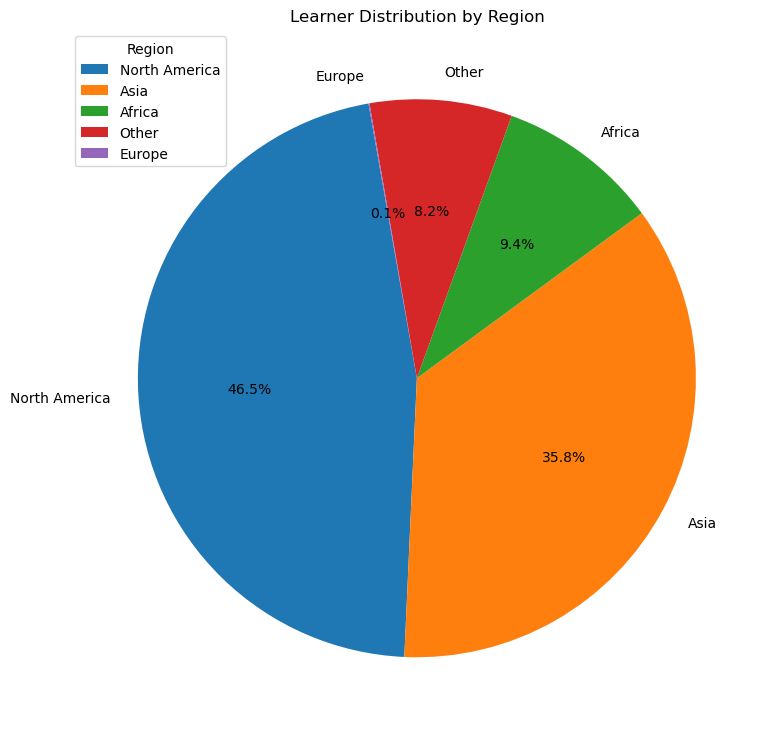

In [11]:
#Learner Distribution by Region

plt.figure(figsize=(9,10))
df_excel["Region"].value_counts().plot.pie(autopct="%1.1f%%", startangle=100)

plt.title("Learner Distribution by Region")
plt.ylabel("")
plt.legend(title="Region")
plt.show()

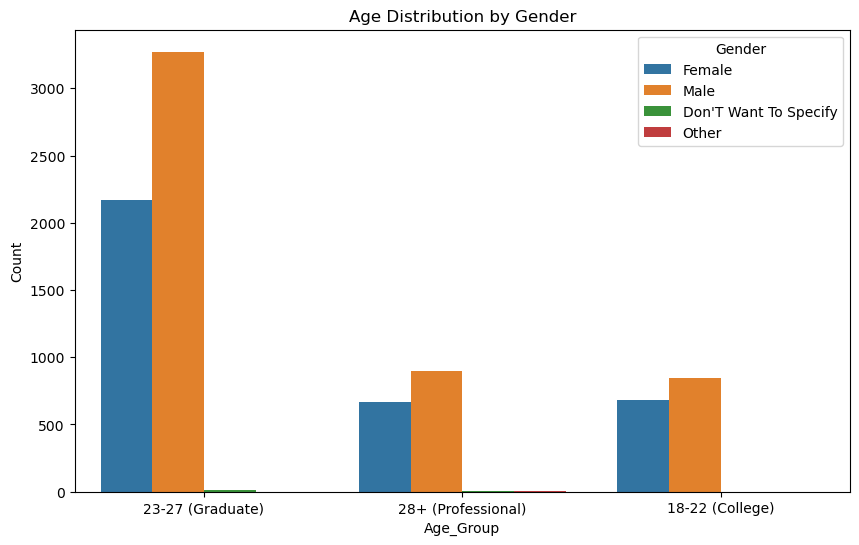

In [12]:
# Age Distribution by Gender

plt.figure(figsize=(10,6))
sns.countplot(data=df_excel, x="Age_Group", hue="Gender")

plt.title("Age Distribution by Gender")
plt.xlabel("Age_Group")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

In [17]:
# outlier

# Define numeric columns to check
num_vars = ['Age', 'Application_Lag_Days', 'Opportunity_Duration_Days', 'Tenure_Days']

# Function to calculate outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return {
        "Column": col,
        "Total_Values": data[col].shape[0],
        "Outliers_Count": outliers.shape[0],
        "Lower_Bound": round(lower_bound,1),
        "Upper_Bound": round(upper_bound,1)
    }

# Apply function to all numeric columns
outlier_summary = pd.DataFrame([detect_outliers_iqr(df_excel, col) for col in num_vars])

# Display summary table
outlier_summary

,Column,Total_Values,Outliers_Count,Lower_Bound,Upper_Bound
0,Age,8558,488,17.0,33.0
1,Application_Lag_Days,8558,992,-219.0,365.0
2,Opportunity_Duration_Days,8558,0,-1281.0,1375.0
3,Tenure_Days,8558,295,235.5,1103.5
